In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import pyabc

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyabc

In [2]:
# multivaraite test
mu = np.array([1,2])
sigma = np.diag([1,1])

y0 = np.random.multivariate_normal(mu, sigma, 10)

def prior_mu():
    return np.random.uniform(0,2,2)

def simulator(mu):
    return np.random.multivariate_normal(mu, sigma, 10)

def mean(x):
    return np.mean(x, 0)

def var(x):
    return np.cov(x.T)

rej_samp = pyabc.RejectionSampler(priors=prior_mu, simulator=simulator, summaries=[mean, var], observation=y0)

## Old version

In [4]:
%timeit rej_samp.sample(nr_samples=1000, threshold=1.0, old_version=True)

Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    10.16 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    10.98 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    11.24 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    11.31 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    11.92 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    12.24 s
Rejection sampler started with threshold: 1.0 

(array([ 17.,  50.,  25.,   5.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.955434,  2.062867,  2.1703  ,  2.277733,  2.385166,  2.492599,
         2.600032,  2.707465,  2.814898,  2.922331,  3.029764]),
 <a list of 10 Patch objects>)

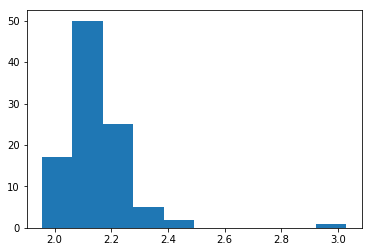

In [12]:
plt.hist(runtimes)

## New version (batch size 1)

In [5]:
%timeit rej_samp.sample(nr_samples=1000, threshold=1.0, batch_size=1)

Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    10.78 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    10.22 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:     9.90 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    10.42 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    10.11 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    10.37 s
Rejection sampler started with threshold: 1.0 

(array([ 26.,  46.,  20.,   2.,   2.,   0.,   0.,   2.,   0.,   2.]),
 array([ 1.90502  ,  2.0371721,  2.1693242,  2.3014763,  2.4336284,
         2.5657805,  2.6979326,  2.8300847,  2.9622368,  3.0943889,
         3.226541 ]),
 <a list of 10 Patch objects>)

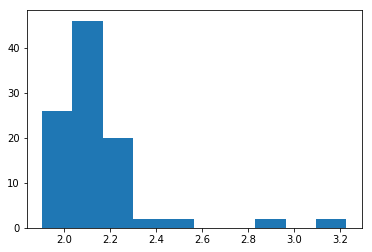

In [14]:
plt.hist(runtimes_nb1)

## New version (batch size 100)

In [6]:
%timeit rej_samp.sample(nr_samples=1000, threshold=1.0, batch_size=100)

Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:     9.52 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:    10.02 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:     9.13 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:     9.34 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:     9.77 s
Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Acceptance rate:          1 % - Time:     8.64 s
Rejection sampler started with threshold: 1.0 

(array([  9.,  56.,  29.,   4.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.75221  ,  1.8580806,  1.9639512,  2.0698218,  2.1756924,
         2.281563 ,  2.3874336,  2.4933042,  2.5991748,  2.7050454,
         2.810916 ]),
 <a list of 10 Patch objects>)

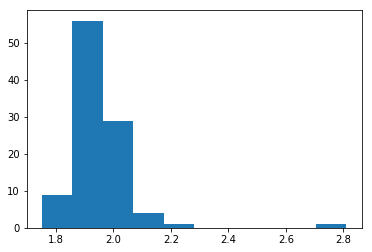

In [16]:
plt.hist(runtimes_nb100)